# **Ensemble Learning: Bagging, Boosting and Stacking**


# Exercise Description

In this exercise first, I use the IRIS Dataset to implement three different basic algorithms using Bagging, Boosting and Stacking.


*   First, I implemented Bagging for Decision Tree as the base estimator.
*   Second, I used Boosting (AdaBoost) for Decision Tree as the base estimator.
*   Finally, I used Stacking with Decision Tree and Logistic Regression as base estimators and SVM as the meta learner.

The second part of this exercise is a comparison between the results obtained using Staking technique over the Wine Dataset. The comparison is made by different metrics and also applying cross validation as we see in previous lectures.
The learners are:

*   **Learner 1:** Random Forest, Decision Tree and SVC as learners and Logistic Regression as meta learner.
*   **Learner 2:** Random Forest, Gradient Boosting and SVC with kernel RBF as learners and a Neural Network as meta learner.







---

# Abstract

# **Ensemble Learning**
Ensemble learning involves combining the predictions of multiple models into one to increase prediction performance, here we have Bagging, boosting, and stacking techniques.

# **Bagging**
Bagging, also known as bootstrap aggregation, is an ensemble learning technique that combines the benefits of bootstrapping and aggregation to yield a stable model and improve the prediction performance of a machine-learning model.

In bagging, we first sample equal-sized subsets of data from a dataset with bootstrapping. Then, we use those subsets to train several weak models independently. To get a stronger model, it is necessary to aggregate the predictions from all the weak models.

The main idea behind bagging is to reduce the variance in a dataset, ensuring that the model is robust and not influenced by specific samples in the dataset.
For this reason, bagging is mainly applied to tree-based machine learning models such as decision trees and random forests.
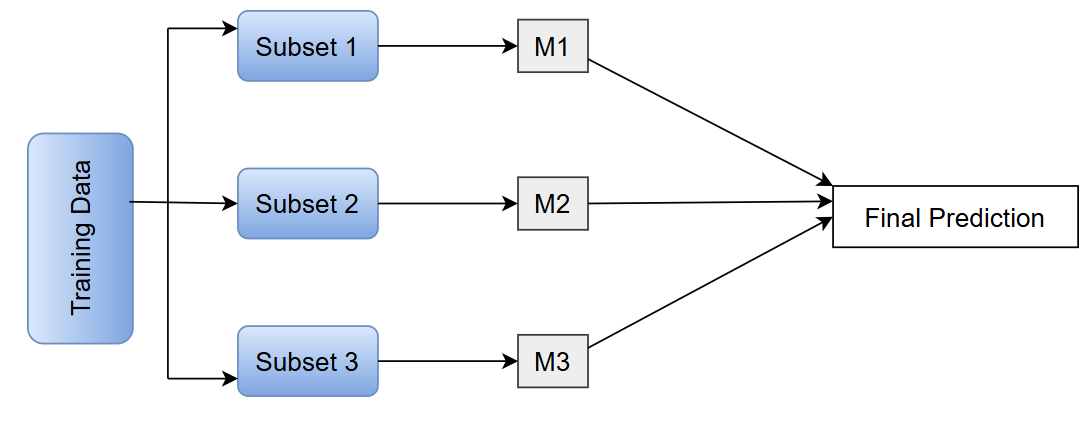

# **Boosting**
In boosting, the training process is a sequence of models. Each model is trained on a weighted training set. Then, weights are assigned based on the errors of the previous models in the sequence.

The main idea behind sequential training is that each model corrects the errors of its predecessor. This continues until the predefined number of trained models or some other criteria are met.During training, instances that are classified incorrectly are assigned higher weights to give some form of priority when trained. Additionally, weaker models are assigned lower weights than strong models when combining their predictions into the final output.

Boosting generally improves the accuracy of a machine learning model by improving the performance of weak learners. The algorithms typically used are XGBoost, CatBoost, and AdaBoost.
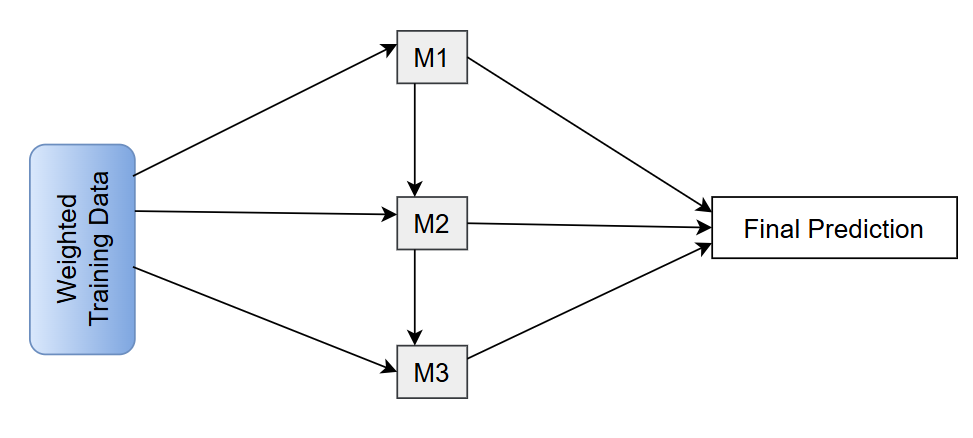

# **Stacking**
In stacking, the predictions of base models are fed as input to a meta-model. The job of the meta-model is to take the predictions of the base models and make a final prediction. The base and meta-models don’t have to be of the same type. For example, it can be paired a decision tree with a support vector machine (SVM).
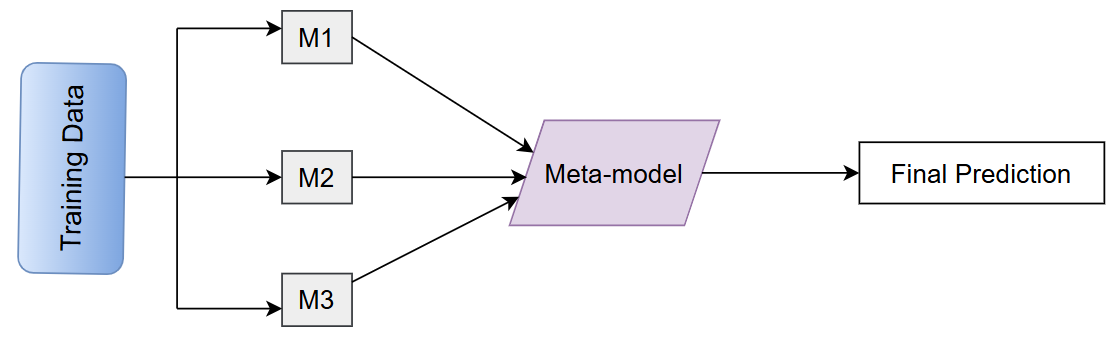

#1. Bagging



In [11]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#Load IRIS dataset
X, y = load_iris(return_X_y=True)

#Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Bagging CLassifier for a DecisionTree as the base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth = 5, max_features = 1),
    n_estimators=10,
    random_state=42)

#Fit on training data
bagging_clf.fit(X_train, y_train)

#Predict on test data
y_pred = bagging_clf.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of BaggingClassifier: {accuracy:.2f}')

# Calculate F1-score, Precision, Recall, and Confusion Matrix
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'F1-Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy of BaggingClassifier: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#2. Boosting



In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#Load IRIS dataset
X, y = load_iris(return_X_y=True)

#Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize Decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=1)

#Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(
    estimator = decision_tree,
    n_estimators=100,
    random_state=42,
    algorithm="SAMME")

#Train the AdaBoost model
ada_clf.fit(X_train, y_train)

#Predict on test data
y_pred = ada_clf.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of scikit-learn AdaBoostClassifier: {accuracy:.2f}')


# Calculate F1-score, Precision, Recall, and Confusion Matrix
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'F1-Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy of scikit-learn AdaBoostClassifier: 0.93
F1-Score: 0.93
Precision: 0.93
Recall: 0.93
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


#3. Stacking



In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC

#Load IRIS dataset
X, y = load_iris(return_X_y=True)

#Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define base learners: decision tree and logistic regression
base_learners = []
base_learners.append(('dt', DecisionTreeClassifier(max_depth=1)))
base_learners.append(('lr', LogisticRegression()))

#Define the meta lerarner: SVM
meta_learner = SVC(probability=True, kernel='linear', random_state = 42)

#Create the stacking classifier
stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5)

#Train the classifier
stack_clf.fit(X_train, y_train)

#Predictions on test data
y_pred = stack_clf.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of StackingClassifier: {accuracy:.2f}')

# Calculate F1-score, Precision, Recall, and Confusion Matrix
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'F1-Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy of StackingClassifier: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#Comparison using different learners using Stacking Technique



Stacking Classifier 1 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Stacking Classifier 2 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Comparison of Metrics:
Accuracy: Stacking 1 = 1.00, Stacking 2 = 1.00
F1-Score: Stacking 1 = 1.00, Stacking 2 = 1.00
Precision: Stacking 1 = 1.

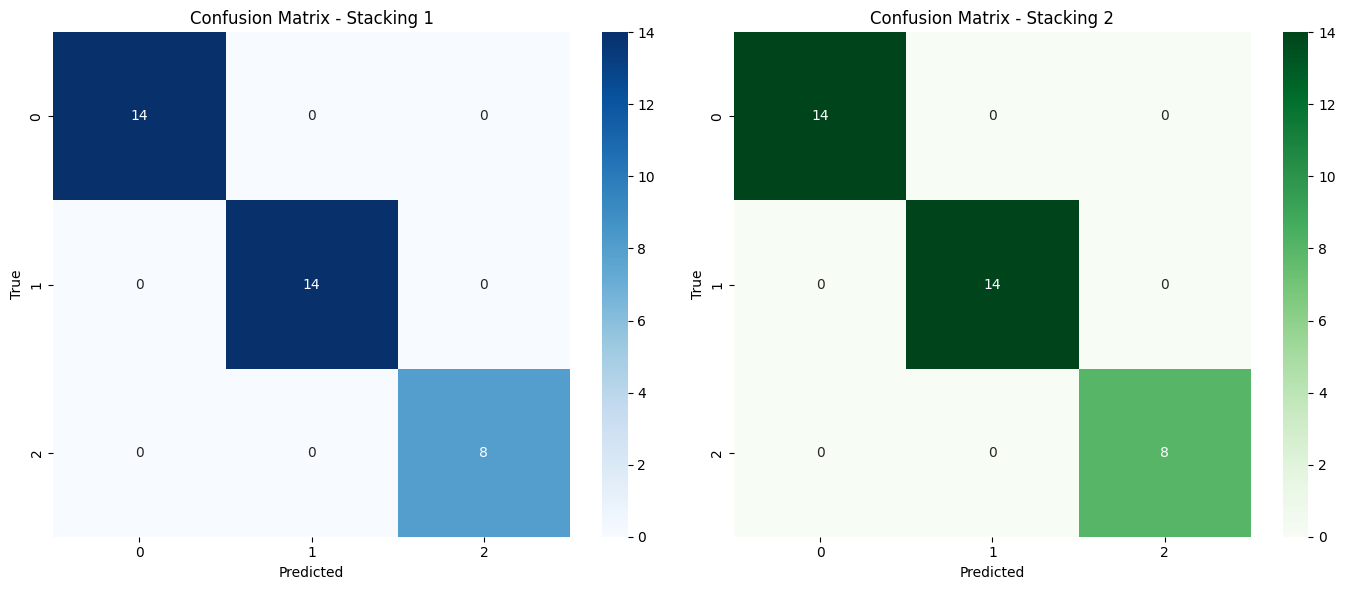

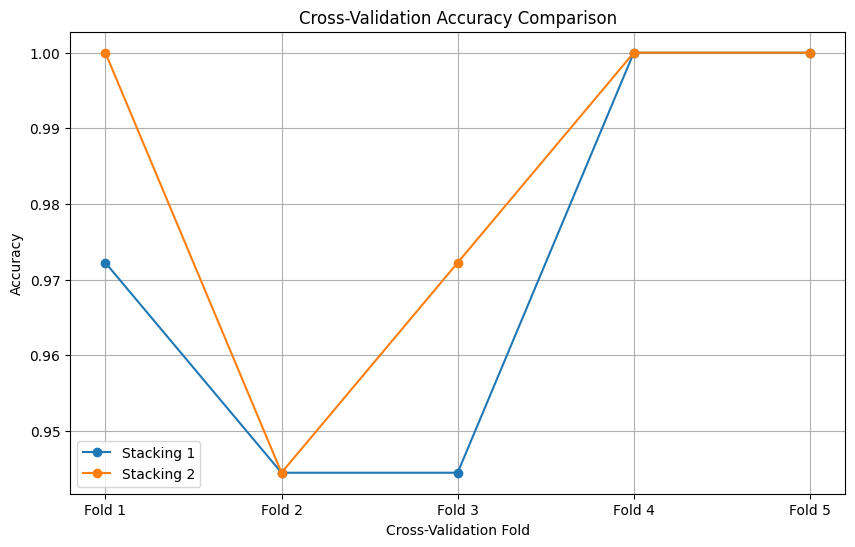

In [14]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
X, y = load_wine(return_X_y=True)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base learners for the Learner 1
base_learners_1 = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
]

# Base learners for the Learner 2
base_learners_2 = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
]

# Meta-learners
meta_learner_1 = LogisticRegression(random_state=42)  # For Learner 1
meta_learner_2 = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)  # For Learner 2

# Two Stacking Classifiers
stack_clf_1 = StackingClassifier(
    estimators=base_learners_1,
    final_estimator=meta_learner_1,
    cv=5
)

stack_clf_2 = StackingClassifier(
    estimators=base_learners_2,
    final_estimator=meta_learner_2,
    cv=5
)

# Train and predict with the first stacking classifier
stack_clf_1.fit(X_train, y_train)
y_pred_1 = stack_clf_1.predict(X_test)

# Train and predict with the second stacking classifier
stack_clf_2.fit(X_train, y_train)
y_pred_2 = stack_clf_2.predict(X_test)

# Metrics for both models
metrics_1 = {
    'Accuracy': accuracy_score(y_test, y_pred_1),
    'F1-Score': f1_score(y_test, y_pred_1, average='weighted'),
    'Precision': precision_score(y_test, y_pred_1, average='weighted'),
    'Recall': recall_score(y_test, y_pred_1, average='weighted')
}

metrics_2 = {
    'Accuracy': accuracy_score(y_test, y_pred_2),
    'F1-Score': f1_score(y_test, y_pred_2, average='weighted'),
    'Precision': precision_score(y_test, y_pred_2, average='weighted'),
    'Recall': recall_score(y_test, y_pred_2, average='weighted')
}

# Print the classification reports
print("Stacking Classifier 1 - Classification Report:")
print(classification_report(y_test, y_pred_1))

print("Stacking Classifier 2 - Classification Report:")
print(classification_report(y_test, y_pred_2))

# Print the metrics comparison
print("\nComparison of Metrics:")
for metric in metrics_1.keys():
    print(f"{metric}: Stacking 1 = {metrics_1[metric]:.2f}, Stacking 2 = {metrics_2[metric]:.2f}")

# Plot confusion matrices
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Stacking 1')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Stacking 2')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# Cross-validation scores for both stacking classifiers
cv_scores_1 = cross_val_score(stack_clf_1, X, y, cv=5, scoring='accuracy')
cv_scores_2 = cross_val_score(stack_clf_2, X, y, cv=5, scoring='accuracy')

# Plot cross-validation comparison
plt.figure(figsize=(10, 6))
x_labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
plt.plot(x_labels, cv_scores_1, label='Stacking 1', marker='o')
plt.plot(x_labels, cv_scores_2, label='Stacking 2', marker='o')
plt.title('Cross-Validation Accuracy Comparison')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


# Final Results

In this exercise I implemented basic algorithms for Bagging, Boosting and Stacking and additionally, I made a comparison between different learners for a new Dataset using the Stacking technique.

 **Analysis**
*   The results for the simple Boosting implementation show a less value in comparison with Bagging and Stacking, even when the value of 0.93 means that the model works pretty well, it is not as good as the other two techiques.

*   The results for both Stacking Classifier 1 and Stacking Classifier 2 show perfect performance across all evaluation metrics: accuracy, precision, recall, and f1-score, with values of 1.00 for every class. This suggests that both stacking models performed exceptionally well on the test set.

*   The first stacking model used a Neural Network as the meta learner, which can capture complex relationships between base learners' outputs.
The second stacking model used Logistic Regression as the meta learner, which is simpler but still effective in this case.

*   Both models performed identically on this dataset. However, this does not imply that they are equally robust or generalizable to new datasets. A larger, more complex dataset might reveal differences in performance due to the choice of meta learner.

# Future Work
For the future work, I can suggest to evaluate the stacking models on larger and more complex datasets with higher dimensionality or noisier data to assess their robustness and generalization.